In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import tree

In [3]:
# Create a synthetic dataset
np.random.seed(42)
n_samples = 300
data = {
    'interest_rate': np.random.rand(n_samples),
    'gdp_growth': np.random.rand(n_samples),
    'inflation': np.random.rand(n_samples),
    'investment_return': np.random.rand(n_samples) * 0.5 # Simulated returns 
}

In [4]:
df = pd.DataFrame(data)

In [6]:
# Update Function: You can retrain model with entirely new or a newly append set of conditions with the following example for new data structure of data frame above or simply update existing dataset by importing in steps demonstrated within previous answers. 

def update_decision_tree(df, model):
    """Retrains the decision tree model with updated data."""
    X = df.drop('investment_return', axis=1)
    y = df['investment_return']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)

    # Plot the first two branches: 
    # Plot each of your branch for your original decision tree prior to implementing tree splitting adjustments made previously and create several subplots for each major condition to see its overall change relative to prior splitting structure as conditions vary across newly-imputed variables if added by an expansion strategy like appending rows
    plt.figure(figsize=(10, 5)) 
    
    if len(model.tree_.feature)>2:  
         tree.plot_tree(model, feature_names=X_train.columns, max_depth=1)
    else:
        tree.plot_tree(model, feature_names=X_train.columns)  
      
    plt.show()

    return model


In [16]:
# Initial Model Training (e.g., using the base 'df')
model = DecisionTreeRegressor(random_state=42, max_depth = 5) # Depth value here impacts pruning or how model simplifies conditions to prevent overfitting through complexity across larger values so needs further consideration with dataset changes
model.fit(df.drop('investment_return', axis=1), df['investment_return'])

DecisionTreeRegressor(max_depth=5, random_state=42)

In [17]:
# Visualize decision trees to compare differences: Generate a static representation after several timeframes (months, years).

# Split the data into training and testing sets
X = df.drop('investment_return', axis=1)
y = df['investment_return']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_tree = tree.export_text(model)
print(f"Base Model Metrics using the following MSE: {mean_squared_error(y_test, model.predict(X_test))}" ) # Example metric - consider the previous metrics discussed when you compare tree efficacy

Base Model Metrics using the following MSE: 0.016051303478823435


In [18]:
# Simulate changing market conditions
df_updated1 = df.copy() # First set of updates for instance one year later, update across monthly-sampled new dataframe. Create more conditions in each step and test its model by looping same data to compare changes
df_updated1['interest_rate'] += np.random.normal(0, 0.05, n_samples) 
df_updated1['gdp_growth'] += np.random.normal(0, 0.02, n_samples)

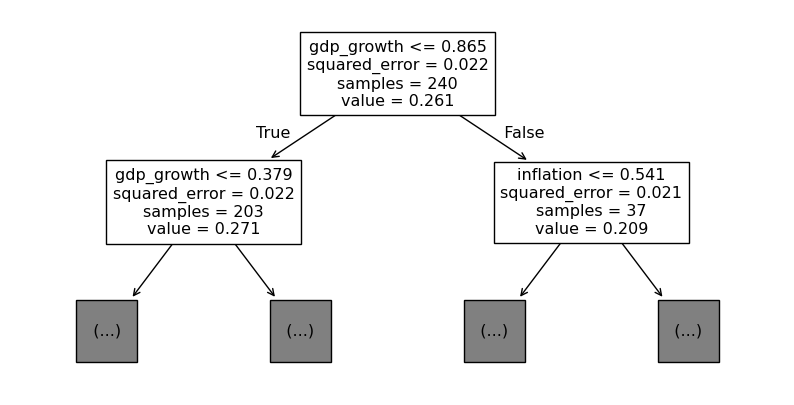

In [19]:
model = update_decision_tree(df_updated1, model)  
update_1 = tree.export_text(model) 

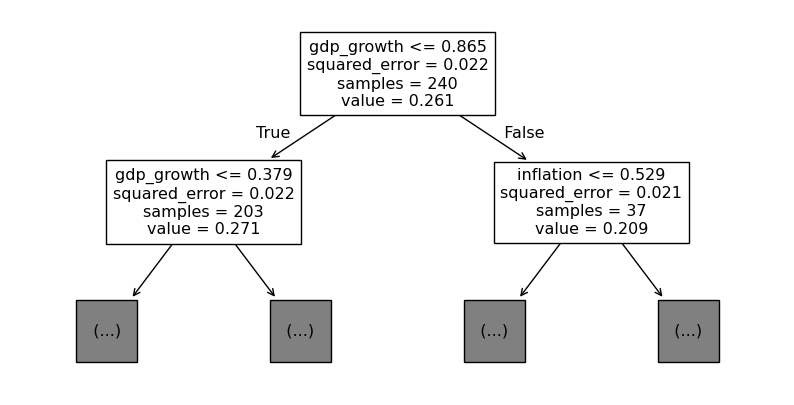

In [20]:
df_updated2 = df_updated1.copy()
df_updated2['inflation'] += np.random.normal(0,0.10,n_samples) # Simulate data drift at end across an unseen condition of new GDP rates where economy contracts due to unforeseen circumstances such as conflict etc
model = update_decision_tree(df_updated2,model)
update_2 = tree.export_text(model) # Export final tree

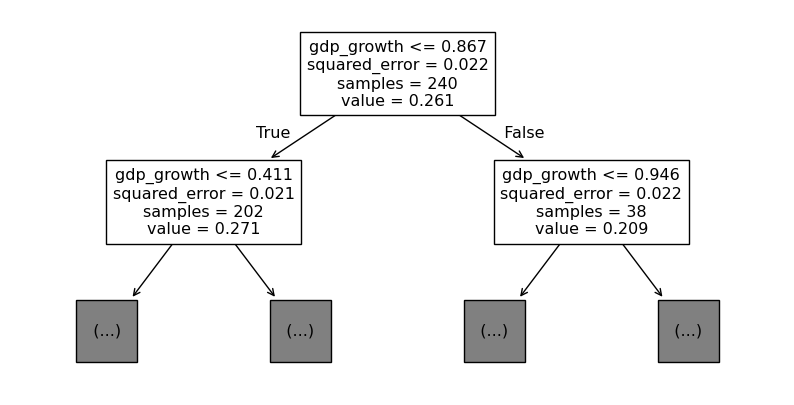

In [21]:
df_updated3 = df.copy()
# Second dataset but inflation across same base year using initial dataset to visualize same inflation metric from before across two different yearly timelines within that same model (year 2, base). Visualize how initial tree from dataset with no inflation performs in a higher-inflation future as tree visualization will vary due to updated condition being reflected at much lower depth level
df_updated3['inflation'] += np.random.normal(0,0.10,n_samples) 
model = update_decision_tree(df_updated3,DecisionTreeRegressor(random_state = 42,max_depth = 3))
update_3 = tree.export_text(model) # export final tree